In [111]:
from diffusers.utils import load_image
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, StableDiffusionPipeline
import torch
from diffusers import UniPCMultistepScheduler
import os
import torchvision.transforms.functional as F
sys.path.insert(1, 'examples/community/')
from stable_diffusion_controlnet_inpaint import StableDiffusionControlNetInpaintPipeline
from stable_diffusion_controlnet_img2img import StableDiffusionControlNetImg2ImgPipeline

In [106]:
!which python
# !/home/ubuntu/anaconda3/bin/pip install git+https://github.com/huggingface/diffusers
# !/usr/bin/pip install transformers
# import sys
# print(sys.path)
# !/home/ubuntu/anaconda3/bin/pip install transformers

/home/ubuntu/anaconda3/bin/python


# Version 1.1: Controlnet hed (无LORA)
# Version 1.2: Controlnet hed (有LORA)

exp_name = "0319_v1.2"

use_lora = ("v1.2" in exp_name)

发现Lora没啥用

输入每一帧Hed图像，直接根据视频跑图生图


In [107]:
# root folder

root_path = "/home/ubuntu/AI二次元/0319_jiaran_yao"

# 视频图片
video_img_path = os.path.join(root_path, "input_images")

# hed图片位置
hed_img_path = os.path.join(root_path, "transfered_images")

# 实验名称

exp_name = "0319_v1.2"

use_lora = ("v1.2" in exp_name)

# 将会保存到 output_images和processed.mp4
# /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.1/processed.mp4
# /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.1/output_images/

# 输出文件夹地址

output_path = os.path.join(root_path, exp_name)

if not os.path.exists(output_path):
    os.mkdir(output_path)
    print("create folder", output_path)
else:
    print("sorry, folder exists, change exp_name")
    print("folder", output_path)
# 输出视频地址
output_video_path = os.path.join(output_path, "processed.mp4")

# 输出图片地址
output_img_path = os.path.join(output_path, "output_images")
if not os.path.exists(output_img_path):
    os.mkdir(output_img_path)

sorry, folder exists, change exp_name
folder /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2


In [108]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-hed", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "gsdf/Counterfeit-V2.5", controlnet=controlnet, torch_dtype=torch.float16
)
if use_lora:
    bin_path = "/home/ubuntu/diffusers/JiaranLora/Jiaran.bin"
    pipe.unet.load_attn_procs(bin_path)
# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

pipe.enable_model_cpu_offload()

In [109]:
# 获取图片总数
video_img_list = os.listdir(video_img_path)
hed_img_list = os.listdir(hed_img_path)
img_num = len(file_list)
img_num

300

## 生成第一帧检查一下

In [1]:

i = 1
filename = str(i) + ".png"
print(filename)
file_path = os.path.join(hed_img_path, filename)
hed_image = Image.open(file_path)
hed_image = SquarePad()(hed_image)
hed_image = F.resize(hed_image, size=(512,512))

hed_image.size
hed_image

torch.manual_seed(32)
# prompt = "masterpiece, best quality, 1girl, solo, dynamic pose, brown hair, blue eyes, long hair, red hair bow, JiaranDianaLoraASOUL_v20SingleCostume, light smile, closed mouth, clean background"
prompt = "masterpiece, best quality, 1girl, solo"
negative_prompt = "nsfw, lowres, bad anatomy, bad hands, text, error, missing fingers,extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
output = pipe(
    prompt,
    hed_image,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
)
output
plt.figure(figsize=(20,20))
plt.imshow(output[0][0])

1.png


NameError: name 'os' is not defined

##  生成所有图片

In [92]:
class SquarePad:
    def __call__(self, image):
        max_wh = max(image.size)
        p_left, p_top = [(max_wh - s) // 2 for s in image.size]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.size, [p_left, p_top])]
        padding = (p_left, p_top, p_right, p_bottom)
        return F.pad(image, padding, 0, 'constant')

In [93]:
for i in range(300):
    filename = str(i+1) + ".png"
    print(filename)
    file_path = os.path.join(hed_img_path, filename)
    hed_image = Image.open(file_path)
    hed_image = SquarePad()(hed_image)
    hed_image = F.resize(hed_image, size=(512,512)) 
    torch.manual_seed(32)
    prompt = "masterpiece, best quality, 1girl, solo, dynamic pose, brown hair, blue eyes, long hair, red hair bow, JiaranDianaLoraASOUL_v20SingleCostume, light smile, cute mouth, clean background"
    negative_prompt = "nsfw, lowres, bad anatomy, bad hands, text, error, missing fingers,extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
    output = pipe(
        prompt,
        hed_image,
        negative_prompt=negative_prompt,
        num_inference_steps=20,
    )
    output[0][0].save(os.path.join(output_img_path, filename))


1.png


  0%|          | 0/20 [00:00<?, ?it/s]

2.png


  0%|          | 0/20 [00:00<?, ?it/s]

3.png


  0%|          | 0/20 [00:00<?, ?it/s]

4.png


  0%|          | 0/20 [00:00<?, ?it/s]

5.png


  0%|          | 0/20 [00:00<?, ?it/s]

6.png


  0%|          | 0/20 [00:00<?, ?it/s]

7.png


  0%|          | 0/20 [00:00<?, ?it/s]

8.png


  0%|          | 0/20 [00:00<?, ?it/s]

9.png


  0%|          | 0/20 [00:00<?, ?it/s]

10.png


  0%|          | 0/20 [00:00<?, ?it/s]

11.png


  0%|          | 0/20 [00:00<?, ?it/s]

12.png


  0%|          | 0/20 [00:00<?, ?it/s]

13.png


  0%|          | 0/20 [00:00<?, ?it/s]

14.png


  0%|          | 0/20 [00:00<?, ?it/s]

15.png


  0%|          | 0/20 [00:00<?, ?it/s]

16.png


  0%|          | 0/20 [00:00<?, ?it/s]

17.png


  0%|          | 0/20 [00:00<?, ?it/s]

18.png


  0%|          | 0/20 [00:00<?, ?it/s]

19.png


  0%|          | 0/20 [00:00<?, ?it/s]

20.png


  0%|          | 0/20 [00:00<?, ?it/s]

21.png


  0%|          | 0/20 [00:00<?, ?it/s]

22.png


  0%|          | 0/20 [00:00<?, ?it/s]

23.png


  0%|          | 0/20 [00:00<?, ?it/s]

24.png


  0%|          | 0/20 [00:00<?, ?it/s]

25.png


  0%|          | 0/20 [00:00<?, ?it/s]

26.png


  0%|          | 0/20 [00:00<?, ?it/s]

27.png


  0%|          | 0/20 [00:00<?, ?it/s]

28.png


  0%|          | 0/20 [00:00<?, ?it/s]

29.png


  0%|          | 0/20 [00:00<?, ?it/s]

30.png


  0%|          | 0/20 [00:00<?, ?it/s]

31.png


  0%|          | 0/20 [00:00<?, ?it/s]

32.png


  0%|          | 0/20 [00:00<?, ?it/s]

33.png


  0%|          | 0/20 [00:00<?, ?it/s]

34.png


  0%|          | 0/20 [00:00<?, ?it/s]

35.png


  0%|          | 0/20 [00:00<?, ?it/s]

36.png


  0%|          | 0/20 [00:00<?, ?it/s]

37.png


  0%|          | 0/20 [00:00<?, ?it/s]

38.png


  0%|          | 0/20 [00:00<?, ?it/s]

39.png


  0%|          | 0/20 [00:00<?, ?it/s]

40.png


  0%|          | 0/20 [00:00<?, ?it/s]

41.png


  0%|          | 0/20 [00:00<?, ?it/s]

42.png


  0%|          | 0/20 [00:00<?, ?it/s]

43.png


  0%|          | 0/20 [00:00<?, ?it/s]

44.png


  0%|          | 0/20 [00:00<?, ?it/s]

45.png


  0%|          | 0/20 [00:00<?, ?it/s]

46.png


  0%|          | 0/20 [00:00<?, ?it/s]

47.png


  0%|          | 0/20 [00:00<?, ?it/s]

48.png


  0%|          | 0/20 [00:00<?, ?it/s]

49.png


  0%|          | 0/20 [00:00<?, ?it/s]

50.png


  0%|          | 0/20 [00:00<?, ?it/s]

51.png


  0%|          | 0/20 [00:00<?, ?it/s]

52.png


  0%|          | 0/20 [00:00<?, ?it/s]

53.png


  0%|          | 0/20 [00:00<?, ?it/s]

54.png


  0%|          | 0/20 [00:00<?, ?it/s]

55.png


  0%|          | 0/20 [00:00<?, ?it/s]

56.png


  0%|          | 0/20 [00:00<?, ?it/s]

57.png


  0%|          | 0/20 [00:00<?, ?it/s]

58.png


  0%|          | 0/20 [00:00<?, ?it/s]

59.png


  0%|          | 0/20 [00:00<?, ?it/s]

60.png


  0%|          | 0/20 [00:00<?, ?it/s]

61.png


  0%|          | 0/20 [00:00<?, ?it/s]

62.png


  0%|          | 0/20 [00:00<?, ?it/s]

63.png


  0%|          | 0/20 [00:00<?, ?it/s]

64.png


  0%|          | 0/20 [00:00<?, ?it/s]

65.png


  0%|          | 0/20 [00:00<?, ?it/s]

66.png


  0%|          | 0/20 [00:00<?, ?it/s]

67.png


  0%|          | 0/20 [00:00<?, ?it/s]

68.png


  0%|          | 0/20 [00:00<?, ?it/s]

69.png


  0%|          | 0/20 [00:00<?, ?it/s]

70.png


  0%|          | 0/20 [00:00<?, ?it/s]

71.png


  0%|          | 0/20 [00:00<?, ?it/s]

72.png


  0%|          | 0/20 [00:00<?, ?it/s]

73.png


  0%|          | 0/20 [00:00<?, ?it/s]

74.png


  0%|          | 0/20 [00:00<?, ?it/s]

75.png


  0%|          | 0/20 [00:00<?, ?it/s]

76.png


  0%|          | 0/20 [00:00<?, ?it/s]

77.png


  0%|          | 0/20 [00:00<?, ?it/s]

78.png


  0%|          | 0/20 [00:00<?, ?it/s]

79.png


  0%|          | 0/20 [00:00<?, ?it/s]

80.png


  0%|          | 0/20 [00:00<?, ?it/s]

81.png


  0%|          | 0/20 [00:00<?, ?it/s]

82.png


  0%|          | 0/20 [00:00<?, ?it/s]

83.png


  0%|          | 0/20 [00:00<?, ?it/s]

84.png


  0%|          | 0/20 [00:00<?, ?it/s]

85.png


  0%|          | 0/20 [00:00<?, ?it/s]

86.png


  0%|          | 0/20 [00:00<?, ?it/s]

87.png


  0%|          | 0/20 [00:00<?, ?it/s]

88.png


  0%|          | 0/20 [00:00<?, ?it/s]

89.png


  0%|          | 0/20 [00:00<?, ?it/s]

90.png


  0%|          | 0/20 [00:00<?, ?it/s]

91.png


  0%|          | 0/20 [00:00<?, ?it/s]

92.png


  0%|          | 0/20 [00:00<?, ?it/s]

93.png


  0%|          | 0/20 [00:00<?, ?it/s]

94.png


  0%|          | 0/20 [00:00<?, ?it/s]

95.png


  0%|          | 0/20 [00:00<?, ?it/s]

96.png


  0%|          | 0/20 [00:00<?, ?it/s]

97.png


  0%|          | 0/20 [00:00<?, ?it/s]

98.png


  0%|          | 0/20 [00:00<?, ?it/s]

99.png


  0%|          | 0/20 [00:00<?, ?it/s]

100.png


  0%|          | 0/20 [00:00<?, ?it/s]

101.png


  0%|          | 0/20 [00:00<?, ?it/s]

102.png


  0%|          | 0/20 [00:00<?, ?it/s]

103.png


  0%|          | 0/20 [00:00<?, ?it/s]

104.png


  0%|          | 0/20 [00:00<?, ?it/s]

105.png


  0%|          | 0/20 [00:00<?, ?it/s]

106.png


  0%|          | 0/20 [00:00<?, ?it/s]

107.png


  0%|          | 0/20 [00:00<?, ?it/s]

108.png


  0%|          | 0/20 [00:00<?, ?it/s]

109.png


  0%|          | 0/20 [00:00<?, ?it/s]

110.png


  0%|          | 0/20 [00:00<?, ?it/s]

111.png


  0%|          | 0/20 [00:00<?, ?it/s]

112.png


  0%|          | 0/20 [00:00<?, ?it/s]

113.png


  0%|          | 0/20 [00:00<?, ?it/s]

114.png


  0%|          | 0/20 [00:00<?, ?it/s]

115.png


  0%|          | 0/20 [00:00<?, ?it/s]

116.png


  0%|          | 0/20 [00:00<?, ?it/s]

117.png


  0%|          | 0/20 [00:00<?, ?it/s]

118.png


  0%|          | 0/20 [00:00<?, ?it/s]

119.png


  0%|          | 0/20 [00:00<?, ?it/s]

120.png


  0%|          | 0/20 [00:00<?, ?it/s]

121.png


  0%|          | 0/20 [00:00<?, ?it/s]

122.png


  0%|          | 0/20 [00:00<?, ?it/s]

123.png


  0%|          | 0/20 [00:00<?, ?it/s]

124.png


  0%|          | 0/20 [00:00<?, ?it/s]

125.png


  0%|          | 0/20 [00:00<?, ?it/s]

126.png


  0%|          | 0/20 [00:00<?, ?it/s]

127.png


  0%|          | 0/20 [00:00<?, ?it/s]

128.png


  0%|          | 0/20 [00:00<?, ?it/s]

129.png


  0%|          | 0/20 [00:00<?, ?it/s]

130.png


  0%|          | 0/20 [00:00<?, ?it/s]

131.png


  0%|          | 0/20 [00:00<?, ?it/s]

132.png


  0%|          | 0/20 [00:00<?, ?it/s]

133.png


  0%|          | 0/20 [00:00<?, ?it/s]

134.png


  0%|          | 0/20 [00:00<?, ?it/s]

135.png


  0%|          | 0/20 [00:00<?, ?it/s]

136.png


  0%|          | 0/20 [00:00<?, ?it/s]

137.png


  0%|          | 0/20 [00:00<?, ?it/s]

138.png


  0%|          | 0/20 [00:00<?, ?it/s]

139.png


  0%|          | 0/20 [00:00<?, ?it/s]

140.png


  0%|          | 0/20 [00:00<?, ?it/s]

141.png


  0%|          | 0/20 [00:00<?, ?it/s]

142.png


  0%|          | 0/20 [00:00<?, ?it/s]

143.png


  0%|          | 0/20 [00:00<?, ?it/s]

144.png


  0%|          | 0/20 [00:00<?, ?it/s]

145.png


  0%|          | 0/20 [00:00<?, ?it/s]

146.png


  0%|          | 0/20 [00:00<?, ?it/s]

147.png


  0%|          | 0/20 [00:00<?, ?it/s]

148.png


  0%|          | 0/20 [00:00<?, ?it/s]

149.png


  0%|          | 0/20 [00:00<?, ?it/s]

150.png


  0%|          | 0/20 [00:00<?, ?it/s]

151.png


  0%|          | 0/20 [00:00<?, ?it/s]

152.png


  0%|          | 0/20 [00:00<?, ?it/s]

153.png


  0%|          | 0/20 [00:00<?, ?it/s]

154.png


  0%|          | 0/20 [00:00<?, ?it/s]

155.png


  0%|          | 0/20 [00:00<?, ?it/s]

156.png


  0%|          | 0/20 [00:00<?, ?it/s]

157.png


  0%|          | 0/20 [00:00<?, ?it/s]

158.png


  0%|          | 0/20 [00:00<?, ?it/s]

159.png


  0%|          | 0/20 [00:00<?, ?it/s]

160.png


  0%|          | 0/20 [00:00<?, ?it/s]

161.png


  0%|          | 0/20 [00:00<?, ?it/s]

162.png


  0%|          | 0/20 [00:00<?, ?it/s]

163.png


  0%|          | 0/20 [00:00<?, ?it/s]

164.png


  0%|          | 0/20 [00:00<?, ?it/s]

165.png


  0%|          | 0/20 [00:00<?, ?it/s]

166.png


  0%|          | 0/20 [00:00<?, ?it/s]

167.png


  0%|          | 0/20 [00:00<?, ?it/s]

168.png


  0%|          | 0/20 [00:00<?, ?it/s]

169.png


  0%|          | 0/20 [00:00<?, ?it/s]

170.png


  0%|          | 0/20 [00:00<?, ?it/s]

171.png


  0%|          | 0/20 [00:00<?, ?it/s]

172.png


  0%|          | 0/20 [00:00<?, ?it/s]

173.png


  0%|          | 0/20 [00:00<?, ?it/s]

174.png


  0%|          | 0/20 [00:00<?, ?it/s]

175.png


  0%|          | 0/20 [00:00<?, ?it/s]

176.png


  0%|          | 0/20 [00:00<?, ?it/s]

177.png


  0%|          | 0/20 [00:00<?, ?it/s]

178.png


  0%|          | 0/20 [00:00<?, ?it/s]

179.png


  0%|          | 0/20 [00:00<?, ?it/s]

180.png


  0%|          | 0/20 [00:00<?, ?it/s]

181.png


  0%|          | 0/20 [00:00<?, ?it/s]

182.png


  0%|          | 0/20 [00:00<?, ?it/s]

183.png


  0%|          | 0/20 [00:00<?, ?it/s]

184.png


  0%|          | 0/20 [00:00<?, ?it/s]

185.png


  0%|          | 0/20 [00:00<?, ?it/s]

186.png


  0%|          | 0/20 [00:00<?, ?it/s]

187.png


  0%|          | 0/20 [00:00<?, ?it/s]

188.png


  0%|          | 0/20 [00:00<?, ?it/s]

189.png


  0%|          | 0/20 [00:00<?, ?it/s]

190.png


  0%|          | 0/20 [00:00<?, ?it/s]

191.png


  0%|          | 0/20 [00:00<?, ?it/s]

192.png


  0%|          | 0/20 [00:00<?, ?it/s]

193.png


  0%|          | 0/20 [00:00<?, ?it/s]

194.png


  0%|          | 0/20 [00:00<?, ?it/s]

195.png


  0%|          | 0/20 [00:00<?, ?it/s]

196.png


  0%|          | 0/20 [00:00<?, ?it/s]

197.png


  0%|          | 0/20 [00:00<?, ?it/s]

198.png


  0%|          | 0/20 [00:00<?, ?it/s]

199.png


  0%|          | 0/20 [00:00<?, ?it/s]

200.png


  0%|          | 0/20 [00:00<?, ?it/s]

201.png


  0%|          | 0/20 [00:00<?, ?it/s]

202.png


  0%|          | 0/20 [00:00<?, ?it/s]

203.png


  0%|          | 0/20 [00:00<?, ?it/s]

204.png


  0%|          | 0/20 [00:00<?, ?it/s]

205.png


  0%|          | 0/20 [00:00<?, ?it/s]

206.png


  0%|          | 0/20 [00:00<?, ?it/s]

207.png


  0%|          | 0/20 [00:00<?, ?it/s]

208.png


  0%|          | 0/20 [00:00<?, ?it/s]

209.png


  0%|          | 0/20 [00:00<?, ?it/s]

210.png


  0%|          | 0/20 [00:00<?, ?it/s]

211.png


  0%|          | 0/20 [00:00<?, ?it/s]

212.png


  0%|          | 0/20 [00:00<?, ?it/s]

213.png


  0%|          | 0/20 [00:00<?, ?it/s]

214.png


  0%|          | 0/20 [00:00<?, ?it/s]

215.png


  0%|          | 0/20 [00:00<?, ?it/s]

216.png


  0%|          | 0/20 [00:00<?, ?it/s]

217.png


  0%|          | 0/20 [00:00<?, ?it/s]

218.png


  0%|          | 0/20 [00:00<?, ?it/s]

219.png


  0%|          | 0/20 [00:00<?, ?it/s]

220.png


  0%|          | 0/20 [00:00<?, ?it/s]

221.png


  0%|          | 0/20 [00:00<?, ?it/s]

222.png


  0%|          | 0/20 [00:00<?, ?it/s]

223.png


  0%|          | 0/20 [00:00<?, ?it/s]

224.png


  0%|          | 0/20 [00:00<?, ?it/s]

225.png


  0%|          | 0/20 [00:00<?, ?it/s]

226.png


  0%|          | 0/20 [00:00<?, ?it/s]

227.png


  0%|          | 0/20 [00:00<?, ?it/s]

228.png


  0%|          | 0/20 [00:00<?, ?it/s]

229.png


  0%|          | 0/20 [00:00<?, ?it/s]

230.png


  0%|          | 0/20 [00:00<?, ?it/s]

231.png


  0%|          | 0/20 [00:00<?, ?it/s]

232.png


  0%|          | 0/20 [00:00<?, ?it/s]

233.png


  0%|          | 0/20 [00:00<?, ?it/s]

234.png


  0%|          | 0/20 [00:00<?, ?it/s]

235.png


  0%|          | 0/20 [00:00<?, ?it/s]

236.png


  0%|          | 0/20 [00:00<?, ?it/s]

237.png


  0%|          | 0/20 [00:00<?, ?it/s]

238.png


  0%|          | 0/20 [00:00<?, ?it/s]

239.png


  0%|          | 0/20 [00:00<?, ?it/s]

240.png


  0%|          | 0/20 [00:00<?, ?it/s]

241.png


  0%|          | 0/20 [00:00<?, ?it/s]

242.png


  0%|          | 0/20 [00:00<?, ?it/s]

243.png


  0%|          | 0/20 [00:00<?, ?it/s]

244.png


  0%|          | 0/20 [00:00<?, ?it/s]

245.png


  0%|          | 0/20 [00:00<?, ?it/s]

246.png


  0%|          | 0/20 [00:00<?, ?it/s]

247.png


  0%|          | 0/20 [00:00<?, ?it/s]

248.png


  0%|          | 0/20 [00:00<?, ?it/s]

249.png


  0%|          | 0/20 [00:00<?, ?it/s]

250.png


  0%|          | 0/20 [00:00<?, ?it/s]

251.png


  0%|          | 0/20 [00:00<?, ?it/s]

252.png


  0%|          | 0/20 [00:00<?, ?it/s]

253.png


  0%|          | 0/20 [00:00<?, ?it/s]

254.png


  0%|          | 0/20 [00:00<?, ?it/s]

255.png


  0%|          | 0/20 [00:00<?, ?it/s]

256.png


  0%|          | 0/20 [00:00<?, ?it/s]

257.png


  0%|          | 0/20 [00:00<?, ?it/s]

258.png


  0%|          | 0/20 [00:00<?, ?it/s]

259.png


  0%|          | 0/20 [00:00<?, ?it/s]

260.png


  0%|          | 0/20 [00:00<?, ?it/s]

261.png


  0%|          | 0/20 [00:00<?, ?it/s]

262.png


  0%|          | 0/20 [00:00<?, ?it/s]

263.png


  0%|          | 0/20 [00:00<?, ?it/s]

264.png


  0%|          | 0/20 [00:00<?, ?it/s]

265.png


  0%|          | 0/20 [00:00<?, ?it/s]

266.png


  0%|          | 0/20 [00:00<?, ?it/s]

267.png


  0%|          | 0/20 [00:00<?, ?it/s]

268.png


  0%|          | 0/20 [00:00<?, ?it/s]

269.png


  0%|          | 0/20 [00:00<?, ?it/s]

270.png


  0%|          | 0/20 [00:00<?, ?it/s]

271.png


  0%|          | 0/20 [00:00<?, ?it/s]

272.png


  0%|          | 0/20 [00:00<?, ?it/s]

273.png


  0%|          | 0/20 [00:00<?, ?it/s]

274.png


  0%|          | 0/20 [00:00<?, ?it/s]

275.png


  0%|          | 0/20 [00:00<?, ?it/s]

276.png


  0%|          | 0/20 [00:00<?, ?it/s]

277.png


  0%|          | 0/20 [00:00<?, ?it/s]

278.png


  0%|          | 0/20 [00:00<?, ?it/s]

279.png


  0%|          | 0/20 [00:00<?, ?it/s]

280.png


  0%|          | 0/20 [00:00<?, ?it/s]

281.png


  0%|          | 0/20 [00:00<?, ?it/s]

282.png


  0%|          | 0/20 [00:00<?, ?it/s]

283.png


  0%|          | 0/20 [00:00<?, ?it/s]

284.png


  0%|          | 0/20 [00:00<?, ?it/s]

285.png


  0%|          | 0/20 [00:00<?, ?it/s]

286.png


  0%|          | 0/20 [00:00<?, ?it/s]

287.png


  0%|          | 0/20 [00:00<?, ?it/s]

288.png


  0%|          | 0/20 [00:00<?, ?it/s]

289.png


  0%|          | 0/20 [00:00<?, ?it/s]

290.png


  0%|          | 0/20 [00:00<?, ?it/s]

291.png


  0%|          | 0/20 [00:00<?, ?it/s]

292.png


  0%|          | 0/20 [00:00<?, ?it/s]

293.png


  0%|          | 0/20 [00:00<?, ?it/s]

294.png


  0%|          | 0/20 [00:00<?, ?it/s]

295.png


  0%|          | 0/20 [00:00<?, ?it/s]

296.png


  0%|          | 0/20 [00:00<?, ?it/s]

297.png


  0%|          | 0/20 [00:00<?, ?it/s]

298.png


  0%|          | 0/20 [00:00<?, ?it/s]

299.png


  0%|          | 0/20 [00:00<?, ?it/s]

300.png


  0%|          | 0/20 [00:00<?, ?it/s]

## 生成视频

In [96]:
fps = 30

# 获取图片总数
file_list = os.listdir(output_img_path)
file_num = len(file_list)

# 获取视频长宽
item = os.path.join(output_img_path, str(1) + '.png')
width, height, _ = cv2.imread(item).shape
print(width, height)
video = cv2.VideoWriter(output_video_path,  cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), fps, (height, width))  # 创建视频流对象


for i in range(file_num):
    item = os.path.join(output_img_path, str(i + 1) + '.png')
    if os.path.exists(item):
        print("read",item)
#         print(cv2.imread(item).shape)
        video.write(cv2.imread(item))  # 把图片写进视频
video.release()  # 释放

512 512
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/1.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/2.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/3.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/4.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/5.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/6.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/7.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/8.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/9.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/10.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/11.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/12.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/13.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/output_images/14.png
read /h

In [95]:
print("output video is here", output_video_path)

output video is here /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.2/processed.mp4


# Version 2: Controlnet image2image
## Version 2.1 : Controlnet image2image 无Lora
## Version 2: Controlnet image2image 有Lora

输入每一帧Hed图像，直接根据视频跑图生图

In [112]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-hed",
                                             #torch_dtype=torch.float16
                                            ).to("cuda")
pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
                "gsdf/Counterfeit-V2.5", controlnet=controlnet, safety_checker=None,
                #torch_dtype=torch.float16
            ).to("cuda")

if use_lora:
    bin_path = "/home/ubuntu/diffusers/JiaranLora/Jiaran.bin"
    pipe.unet.load_attn_procs(bin_path)
# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [138]:
# root folder

root_path = "/home/ubuntu/AI二次元/0319_jiaran_yao"

# 视频图片
video_img_path = os.path.join(root_path, "input_images")

# 视频图片tag

tag_img_path = os.path.join(root_path, "image_tags")

# hed图片位置
hed_img_path = os.path.join(root_path, "transfered_images")

# 实验名称

exp_name = "0319_v2.1"

use_lora = ("v2.2" in exp_name)

# 将会保存到 output_images和processed.mp4
# /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.1/processed.mp4
# /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v1.1/output_images/

# 输出文件夹地址

output_path = os.path.join(root_path, exp_name)

if not os.path.exists(output_path):
    os.mkdir(output_path)
    print("create folder", output_path)
else:
    print("sorry, folder exists, change exp_name")
    print("folder", output_path)
# 输出视频地址
output_video_path = os.path.join(output_path, "processed.mp4")

# 输出图片地址
output_img_path = os.path.join(output_path, "output_images")
if not os.path.exists(output_img_path):
    os.mkdir(output_img_path)
    
# 获取图片总数
video_img_list = os.listdir(video_img_path)
hed_img_list = os.listdir(hed_img_path)
img_num = len(hed_img_list)
img_num

sorry, folder exists, change exp_name
folder /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1


955

# 检查第一帧

100.png
1girl, solo, blue eyes, long hair, thighhighs, night, smile, sky, hand on hip, looking at viewer, brown hair, night sky, dress, outdoors, star (sky), white thighhighs, clenched hand, cityscape, bow, animal ears, long sleeves, standing, bangs, city


  0%|          | 0/16 [00:00<?, ?it/s]

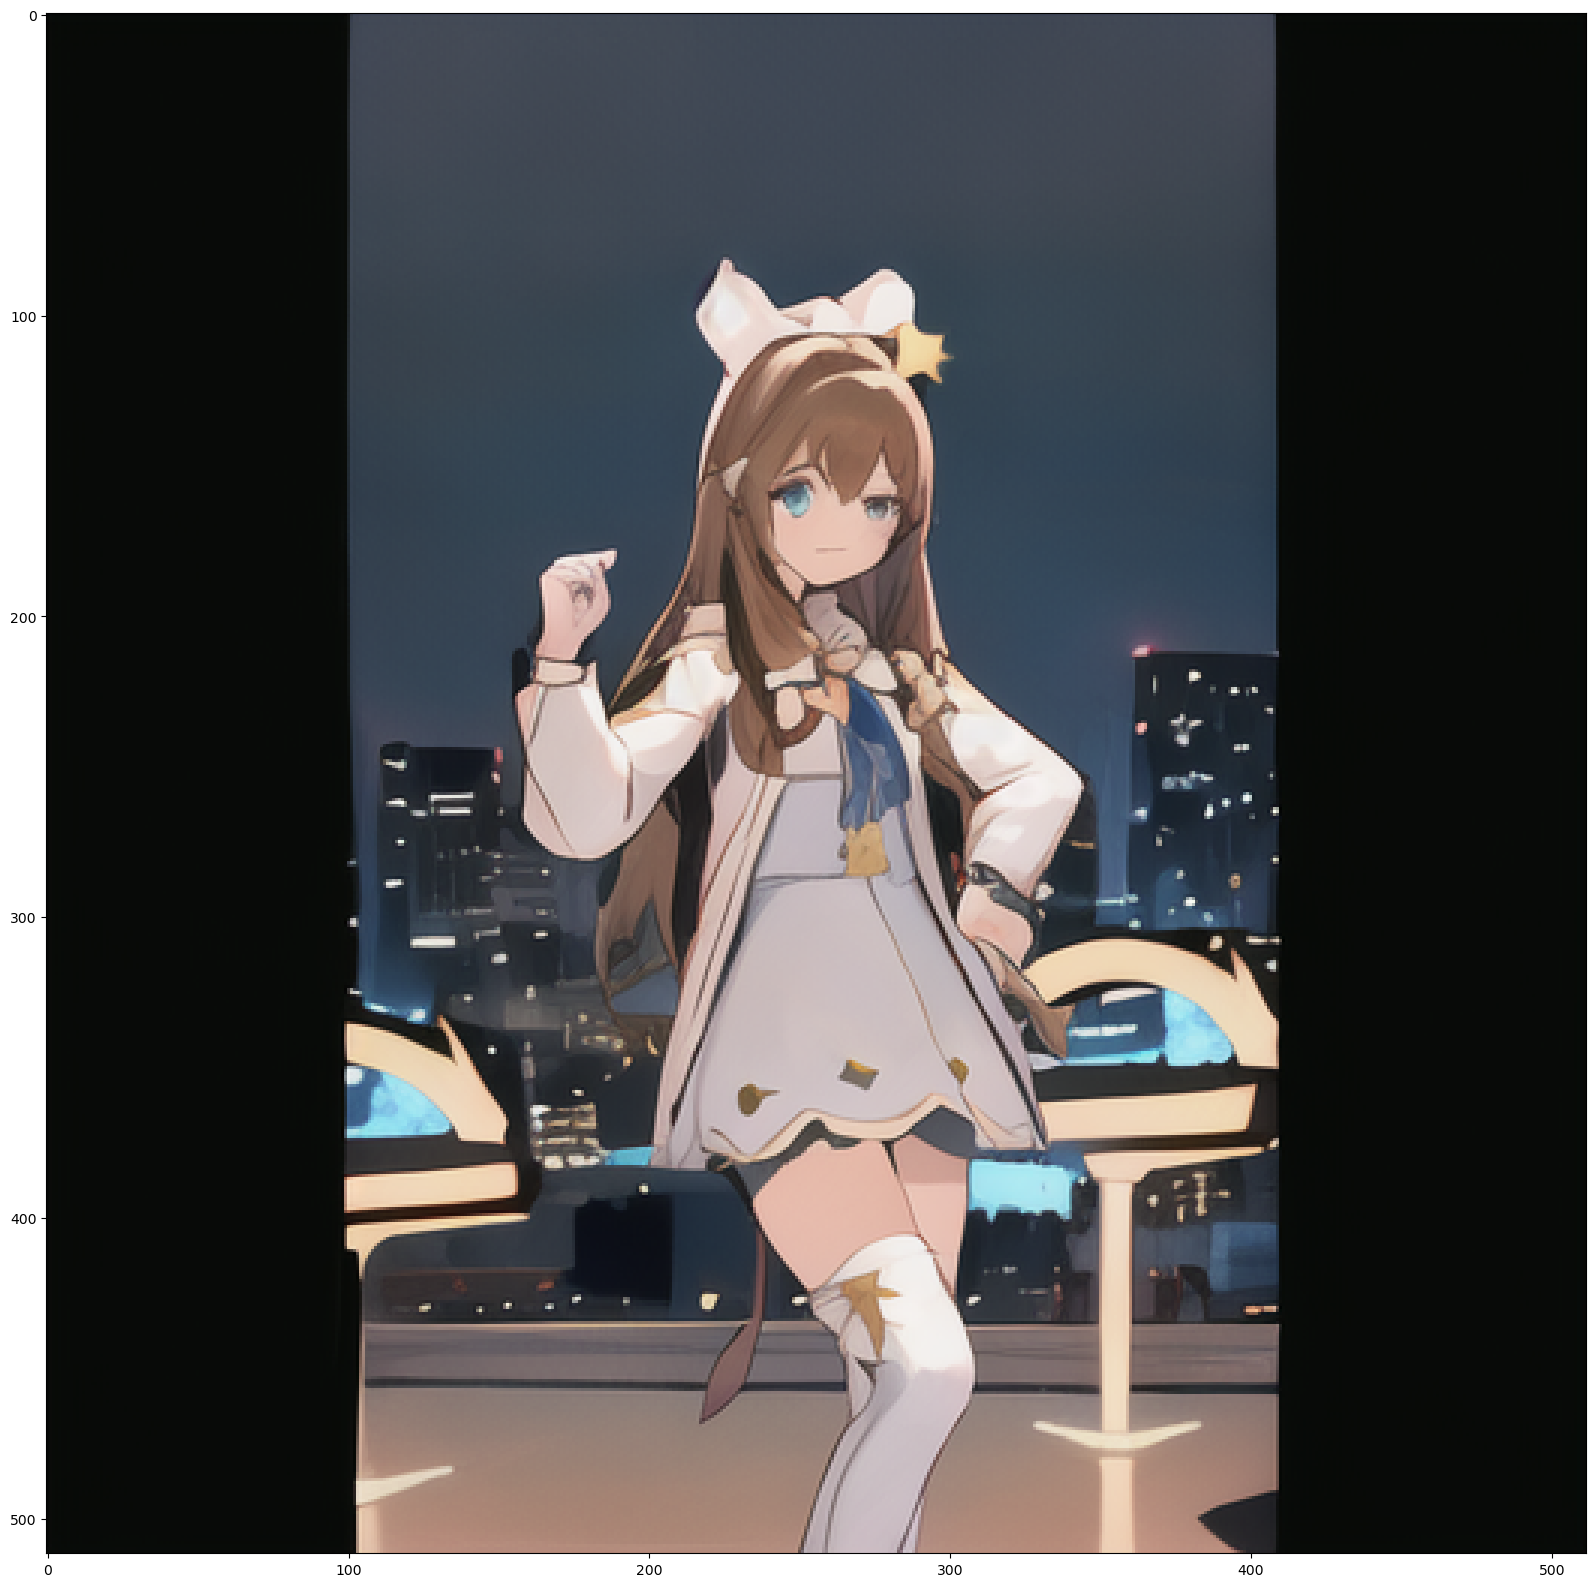

In [143]:
i = 100
filename = str(i) + ".png"
print(filename)
file_path = os.path.join(hed_img_path, filename)
hed_image = Image.open(file_path)
hed_image = SquarePad()(hed_image)
hed_image = F.resize(hed_image, size=(512,512))

file_path = os.path.join(video_img_path, filename)
video_image = Image.open(file_path)
video_image = SquarePad()(video_image)
video_image = F.resize(video_image, size=(512,512))

# load wdv14 tag
filename = str(i) + ".txt"
file_path = os.path.join(tag_img_path, filename)
with open(file_path, 'r') as file:
    data = file.read().replace('\n', '')
print(data)


torch.manual_seed(32)
# prompt = "masterpiece, best quality, 1girl, solo, dynamic pose, brown hair, blue eyes, long hair, red hair bow, JiaranDianaLoraASOUL_v20SingleCostume, light smile, closed mouth, clean background"
# prompt = "masterpiece, best quality, 1girl, solo, large blue eyes"
prompt = data
negative_prompt = "nsfw, lowres, bad anatomy, bad hands, text, error, missing fingers,extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
output = pipe(
    prompt,
    video_image,
    hed_image,
    strength = 0.8,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
)
output
plt.figure(figsize=(20,20))
plt.imshow(output[0][0])

# 生成所有图片


1.png


  0%|          | 0/18 [00:00<?, ?it/s]

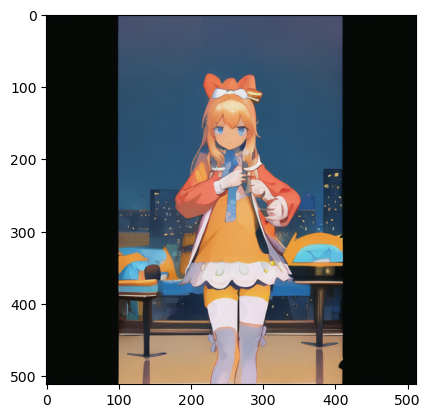

2.png


  0%|          | 0/18 [00:00<?, ?it/s]

3.png


  0%|          | 0/18 [00:00<?, ?it/s]

4.png


  0%|          | 0/18 [00:00<?, ?it/s]

5.png


  0%|          | 0/18 [00:00<?, ?it/s]

6.png


  0%|          | 0/18 [00:00<?, ?it/s]

7.png


  0%|          | 0/18 [00:00<?, ?it/s]

8.png


  0%|          | 0/18 [00:00<?, ?it/s]

9.png


  0%|          | 0/18 [00:00<?, ?it/s]

10.png


  0%|          | 0/18 [00:00<?, ?it/s]

11.png


  0%|          | 0/18 [00:00<?, ?it/s]

12.png


  0%|          | 0/18 [00:00<?, ?it/s]

13.png


  0%|          | 0/18 [00:00<?, ?it/s]

14.png


  0%|          | 0/18 [00:00<?, ?it/s]

15.png


  0%|          | 0/18 [00:00<?, ?it/s]

16.png


  0%|          | 0/18 [00:00<?, ?it/s]

17.png


  0%|          | 0/18 [00:00<?, ?it/s]

18.png


  0%|          | 0/18 [00:00<?, ?it/s]

19.png


  0%|          | 0/18 [00:00<?, ?it/s]

20.png


  0%|          | 0/18 [00:00<?, ?it/s]

21.png


  0%|          | 0/18 [00:00<?, ?it/s]

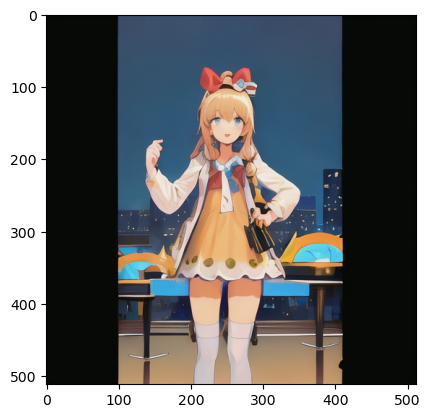

22.png


  0%|          | 0/18 [00:00<?, ?it/s]

23.png


  0%|          | 0/18 [00:00<?, ?it/s]

24.png


  0%|          | 0/18 [00:00<?, ?it/s]

25.png


  0%|          | 0/18 [00:00<?, ?it/s]

26.png


  0%|          | 0/18 [00:00<?, ?it/s]

27.png


  0%|          | 0/18 [00:00<?, ?it/s]

28.png


  0%|          | 0/18 [00:00<?, ?it/s]

29.png


  0%|          | 0/18 [00:00<?, ?it/s]

30.png


  0%|          | 0/18 [00:00<?, ?it/s]

31.png


  0%|          | 0/18 [00:00<?, ?it/s]

32.png


  0%|          | 0/18 [00:00<?, ?it/s]

33.png


  0%|          | 0/18 [00:00<?, ?it/s]

34.png


  0%|          | 0/18 [00:00<?, ?it/s]

35.png


  0%|          | 0/18 [00:00<?, ?it/s]

36.png


  0%|          | 0/18 [00:00<?, ?it/s]

37.png


  0%|          | 0/18 [00:00<?, ?it/s]

38.png


  0%|          | 0/18 [00:00<?, ?it/s]

39.png


  0%|          | 0/18 [00:00<?, ?it/s]

40.png


  0%|          | 0/18 [00:00<?, ?it/s]

41.png


  0%|          | 0/18 [00:00<?, ?it/s]

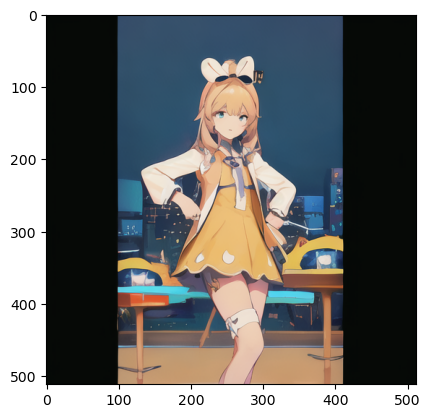

42.png


  0%|          | 0/18 [00:00<?, ?it/s]

43.png


  0%|          | 0/18 [00:00<?, ?it/s]

44.png


  0%|          | 0/18 [00:00<?, ?it/s]

45.png


  0%|          | 0/18 [00:00<?, ?it/s]

46.png


  0%|          | 0/18 [00:00<?, ?it/s]

47.png


  0%|          | 0/18 [00:00<?, ?it/s]

48.png


  0%|          | 0/18 [00:00<?, ?it/s]

49.png


  0%|          | 0/18 [00:00<?, ?it/s]

50.png


  0%|          | 0/18 [00:00<?, ?it/s]

51.png


  0%|          | 0/18 [00:00<?, ?it/s]

52.png


  0%|          | 0/18 [00:00<?, ?it/s]

53.png


  0%|          | 0/18 [00:00<?, ?it/s]

54.png


  0%|          | 0/18 [00:00<?, ?it/s]

55.png


  0%|          | 0/18 [00:00<?, ?it/s]

56.png


  0%|          | 0/18 [00:00<?, ?it/s]

57.png


  0%|          | 0/18 [00:00<?, ?it/s]

58.png


  0%|          | 0/18 [00:00<?, ?it/s]

59.png


  0%|          | 0/18 [00:00<?, ?it/s]

60.png


  0%|          | 0/18 [00:00<?, ?it/s]

61.png


  0%|          | 0/18 [00:00<?, ?it/s]

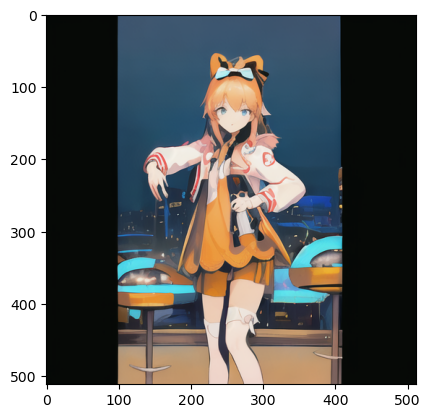

62.png


  0%|          | 0/18 [00:00<?, ?it/s]

63.png


  0%|          | 0/18 [00:00<?, ?it/s]

64.png


  0%|          | 0/18 [00:00<?, ?it/s]

65.png


  0%|          | 0/18 [00:00<?, ?it/s]

66.png


  0%|          | 0/18 [00:00<?, ?it/s]

67.png


  0%|          | 0/18 [00:00<?, ?it/s]

68.png


  0%|          | 0/18 [00:00<?, ?it/s]

69.png


  0%|          | 0/18 [00:00<?, ?it/s]

70.png


  0%|          | 0/18 [00:00<?, ?it/s]

71.png


  0%|          | 0/18 [00:00<?, ?it/s]

72.png


  0%|          | 0/18 [00:00<?, ?it/s]

73.png


  0%|          | 0/18 [00:00<?, ?it/s]

74.png


  0%|          | 0/18 [00:00<?, ?it/s]

75.png


  0%|          | 0/18 [00:00<?, ?it/s]

76.png


  0%|          | 0/18 [00:00<?, ?it/s]

77.png


  0%|          | 0/18 [00:00<?, ?it/s]

78.png


  0%|          | 0/18 [00:00<?, ?it/s]

79.png


  0%|          | 0/18 [00:00<?, ?it/s]

80.png


  0%|          | 0/18 [00:00<?, ?it/s]

81.png


  0%|          | 0/18 [00:00<?, ?it/s]

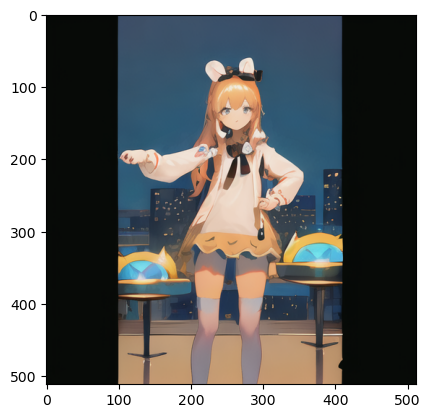

82.png


  0%|          | 0/18 [00:00<?, ?it/s]

83.png


  0%|          | 0/18 [00:00<?, ?it/s]

84.png


  0%|          | 0/18 [00:00<?, ?it/s]

85.png


  0%|          | 0/18 [00:00<?, ?it/s]

86.png


  0%|          | 0/18 [00:00<?, ?it/s]

87.png


  0%|          | 0/18 [00:00<?, ?it/s]

88.png


  0%|          | 0/18 [00:00<?, ?it/s]

89.png


  0%|          | 0/18 [00:00<?, ?it/s]

90.png


  0%|          | 0/18 [00:00<?, ?it/s]

91.png


  0%|          | 0/18 [00:00<?, ?it/s]

92.png


  0%|          | 0/18 [00:00<?, ?it/s]

93.png


  0%|          | 0/18 [00:00<?, ?it/s]

94.png


  0%|          | 0/18 [00:00<?, ?it/s]

95.png


  0%|          | 0/18 [00:00<?, ?it/s]

96.png


  0%|          | 0/18 [00:00<?, ?it/s]

97.png


  0%|          | 0/18 [00:00<?, ?it/s]

98.png


  0%|          | 0/18 [00:00<?, ?it/s]

99.png


  0%|          | 0/18 [00:00<?, ?it/s]

100.png


  0%|          | 0/18 [00:00<?, ?it/s]

101.png


  0%|          | 0/18 [00:00<?, ?it/s]

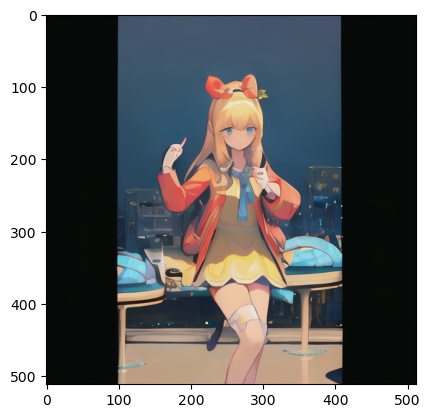

102.png


  0%|          | 0/18 [00:00<?, ?it/s]

103.png


  0%|          | 0/18 [00:00<?, ?it/s]

104.png


  0%|          | 0/18 [00:00<?, ?it/s]

105.png


  0%|          | 0/18 [00:00<?, ?it/s]

106.png


  0%|          | 0/18 [00:00<?, ?it/s]

107.png


  0%|          | 0/18 [00:00<?, ?it/s]

108.png


  0%|          | 0/18 [00:00<?, ?it/s]

109.png


  0%|          | 0/18 [00:00<?, ?it/s]

110.png


  0%|          | 0/18 [00:00<?, ?it/s]

111.png


  0%|          | 0/18 [00:00<?, ?it/s]

112.png


  0%|          | 0/18 [00:00<?, ?it/s]

113.png


  0%|          | 0/18 [00:00<?, ?it/s]

114.png


  0%|          | 0/18 [00:00<?, ?it/s]

115.png


  0%|          | 0/18 [00:00<?, ?it/s]

116.png


  0%|          | 0/18 [00:00<?, ?it/s]

117.png


  0%|          | 0/18 [00:00<?, ?it/s]

118.png


  0%|          | 0/18 [00:00<?, ?it/s]

119.png


  0%|          | 0/18 [00:00<?, ?it/s]

120.png


  0%|          | 0/18 [00:00<?, ?it/s]

121.png


  0%|          | 0/18 [00:00<?, ?it/s]

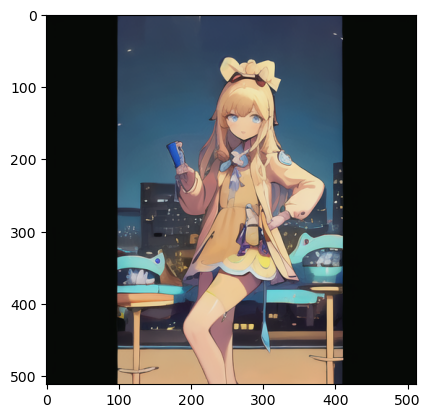

122.png


  0%|          | 0/18 [00:00<?, ?it/s]

123.png


  0%|          | 0/18 [00:00<?, ?it/s]

124.png


  0%|          | 0/18 [00:00<?, ?it/s]

125.png


  0%|          | 0/18 [00:00<?, ?it/s]

126.png


  0%|          | 0/18 [00:00<?, ?it/s]

127.png


  0%|          | 0/18 [00:00<?, ?it/s]

128.png


  0%|          | 0/18 [00:00<?, ?it/s]

129.png


  0%|          | 0/18 [00:00<?, ?it/s]

130.png


  0%|          | 0/18 [00:00<?, ?it/s]

131.png


  0%|          | 0/18 [00:00<?, ?it/s]

132.png


  0%|          | 0/18 [00:00<?, ?it/s]

133.png


  0%|          | 0/18 [00:00<?, ?it/s]

134.png


  0%|          | 0/18 [00:00<?, ?it/s]

135.png


  0%|          | 0/18 [00:00<?, ?it/s]

136.png


  0%|          | 0/18 [00:00<?, ?it/s]

137.png


  0%|          | 0/18 [00:00<?, ?it/s]

138.png


  0%|          | 0/18 [00:00<?, ?it/s]

139.png


  0%|          | 0/18 [00:00<?, ?it/s]

140.png


  0%|          | 0/18 [00:00<?, ?it/s]

141.png


  0%|          | 0/18 [00:00<?, ?it/s]

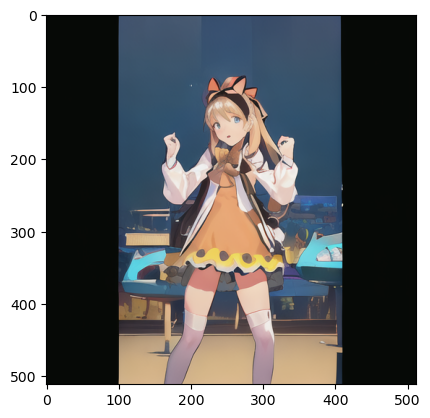

142.png


  0%|          | 0/18 [00:00<?, ?it/s]

143.png


  0%|          | 0/18 [00:00<?, ?it/s]

144.png


  0%|          | 0/18 [00:00<?, ?it/s]

145.png


  0%|          | 0/18 [00:00<?, ?it/s]

146.png


  0%|          | 0/18 [00:00<?, ?it/s]

147.png


  0%|          | 0/18 [00:00<?, ?it/s]

148.png


  0%|          | 0/18 [00:00<?, ?it/s]

149.png


  0%|          | 0/18 [00:00<?, ?it/s]

150.png


  0%|          | 0/18 [00:00<?, ?it/s]

151.png


  0%|          | 0/18 [00:00<?, ?it/s]

152.png


  0%|          | 0/18 [00:00<?, ?it/s]

153.png


  0%|          | 0/18 [00:00<?, ?it/s]

154.png


  0%|          | 0/18 [00:00<?, ?it/s]

155.png


  0%|          | 0/18 [00:00<?, ?it/s]

156.png


  0%|          | 0/18 [00:00<?, ?it/s]

157.png


  0%|          | 0/18 [00:00<?, ?it/s]

158.png


  0%|          | 0/18 [00:00<?, ?it/s]

159.png


  0%|          | 0/18 [00:00<?, ?it/s]

160.png


  0%|          | 0/18 [00:00<?, ?it/s]

161.png


  0%|          | 0/18 [00:00<?, ?it/s]

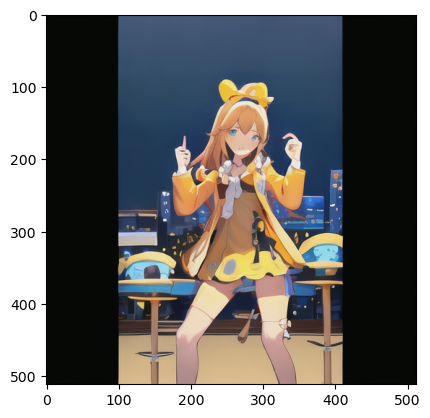

162.png


  0%|          | 0/18 [00:00<?, ?it/s]

163.png


  0%|          | 0/18 [00:00<?, ?it/s]

164.png


  0%|          | 0/18 [00:00<?, ?it/s]

165.png


  0%|          | 0/18 [00:00<?, ?it/s]

166.png


  0%|          | 0/18 [00:00<?, ?it/s]

167.png


  0%|          | 0/18 [00:00<?, ?it/s]

168.png


  0%|          | 0/18 [00:00<?, ?it/s]

169.png


  0%|          | 0/18 [00:00<?, ?it/s]

170.png


  0%|          | 0/18 [00:00<?, ?it/s]

171.png


  0%|          | 0/18 [00:00<?, ?it/s]

172.png


  0%|          | 0/18 [00:00<?, ?it/s]

173.png


  0%|          | 0/18 [00:00<?, ?it/s]

174.png


  0%|          | 0/18 [00:00<?, ?it/s]

175.png


  0%|          | 0/18 [00:00<?, ?it/s]

176.png


  0%|          | 0/18 [00:00<?, ?it/s]

177.png


  0%|          | 0/18 [00:00<?, ?it/s]

178.png


  0%|          | 0/18 [00:00<?, ?it/s]

179.png


  0%|          | 0/18 [00:00<?, ?it/s]

180.png


  0%|          | 0/18 [00:00<?, ?it/s]

181.png


  0%|          | 0/18 [00:00<?, ?it/s]

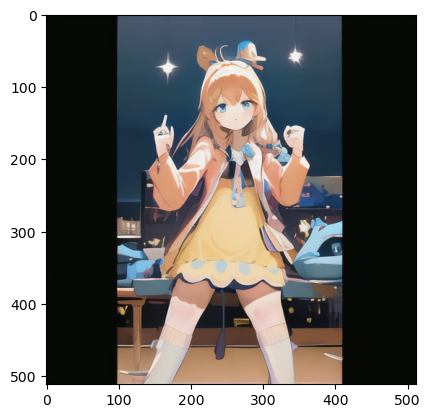

182.png


  0%|          | 0/18 [00:00<?, ?it/s]

183.png


  0%|          | 0/18 [00:00<?, ?it/s]

184.png


  0%|          | 0/18 [00:00<?, ?it/s]

185.png


  0%|          | 0/18 [00:00<?, ?it/s]

186.png


  0%|          | 0/18 [00:00<?, ?it/s]

187.png


  0%|          | 0/18 [00:00<?, ?it/s]

188.png


  0%|          | 0/18 [00:00<?, ?it/s]

189.png


  0%|          | 0/18 [00:00<?, ?it/s]

190.png


  0%|          | 0/18 [00:00<?, ?it/s]

191.png


  0%|          | 0/18 [00:00<?, ?it/s]

192.png


  0%|          | 0/18 [00:00<?, ?it/s]

193.png


  0%|          | 0/18 [00:00<?, ?it/s]

194.png


  0%|          | 0/18 [00:00<?, ?it/s]

195.png


  0%|          | 0/18 [00:00<?, ?it/s]

196.png


  0%|          | 0/18 [00:00<?, ?it/s]

197.png


  0%|          | 0/18 [00:00<?, ?it/s]

198.png


  0%|          | 0/18 [00:00<?, ?it/s]

199.png


  0%|          | 0/18 [00:00<?, ?it/s]

200.png


  0%|          | 0/18 [00:00<?, ?it/s]

201.png


  0%|          | 0/18 [00:00<?, ?it/s]

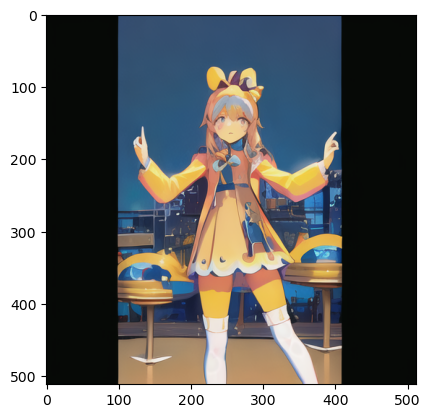

202.png


  0%|          | 0/18 [00:00<?, ?it/s]

203.png


  0%|          | 0/18 [00:00<?, ?it/s]

204.png


  0%|          | 0/18 [00:00<?, ?it/s]

205.png


  0%|          | 0/18 [00:00<?, ?it/s]

206.png


  0%|          | 0/18 [00:00<?, ?it/s]

207.png


  0%|          | 0/18 [00:00<?, ?it/s]

208.png


  0%|          | 0/18 [00:00<?, ?it/s]

209.png


  0%|          | 0/18 [00:00<?, ?it/s]

210.png


  0%|          | 0/18 [00:00<?, ?it/s]

211.png


  0%|          | 0/18 [00:00<?, ?it/s]

212.png


  0%|          | 0/18 [00:00<?, ?it/s]

213.png


  0%|          | 0/18 [00:00<?, ?it/s]

214.png


  0%|          | 0/18 [00:00<?, ?it/s]

215.png


  0%|          | 0/18 [00:00<?, ?it/s]

216.png


  0%|          | 0/18 [00:00<?, ?it/s]

217.png


  0%|          | 0/18 [00:00<?, ?it/s]

218.png


  0%|          | 0/18 [00:00<?, ?it/s]

219.png


  0%|          | 0/18 [00:00<?, ?it/s]

220.png


  0%|          | 0/18 [00:00<?, ?it/s]

221.png


  0%|          | 0/18 [00:00<?, ?it/s]

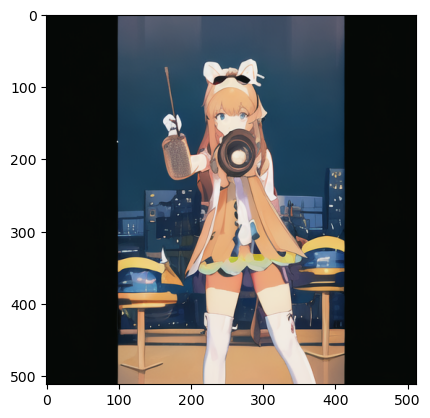

222.png


  0%|          | 0/18 [00:00<?, ?it/s]

223.png


  0%|          | 0/18 [00:00<?, ?it/s]

224.png


  0%|          | 0/18 [00:00<?, ?it/s]

225.png


  0%|          | 0/18 [00:00<?, ?it/s]

226.png


  0%|          | 0/18 [00:00<?, ?it/s]

227.png


  0%|          | 0/18 [00:00<?, ?it/s]

228.png


  0%|          | 0/18 [00:00<?, ?it/s]

229.png


  0%|          | 0/18 [00:00<?, ?it/s]

230.png


  0%|          | 0/18 [00:00<?, ?it/s]

231.png


  0%|          | 0/18 [00:00<?, ?it/s]

232.png


  0%|          | 0/18 [00:00<?, ?it/s]

233.png


  0%|          | 0/18 [00:00<?, ?it/s]

234.png


  0%|          | 0/18 [00:00<?, ?it/s]

235.png


  0%|          | 0/18 [00:00<?, ?it/s]

236.png


  0%|          | 0/18 [00:00<?, ?it/s]

237.png


  0%|          | 0/18 [00:00<?, ?it/s]

238.png


  0%|          | 0/18 [00:00<?, ?it/s]

239.png


  0%|          | 0/18 [00:00<?, ?it/s]

240.png


  0%|          | 0/18 [00:00<?, ?it/s]

241.png


  0%|          | 0/18 [00:00<?, ?it/s]

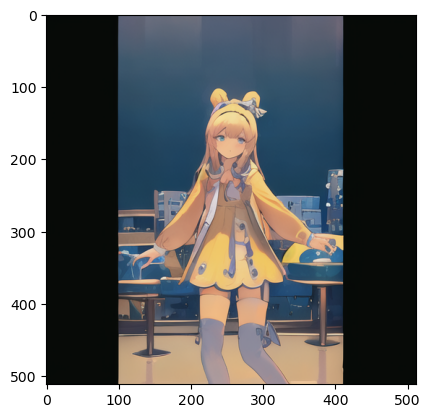

242.png


  0%|          | 0/18 [00:00<?, ?it/s]

243.png


  0%|          | 0/18 [00:00<?, ?it/s]

244.png


  0%|          | 0/18 [00:00<?, ?it/s]

245.png


  0%|          | 0/18 [00:00<?, ?it/s]

246.png


  0%|          | 0/18 [00:00<?, ?it/s]

247.png


  0%|          | 0/18 [00:00<?, ?it/s]

248.png


  0%|          | 0/18 [00:00<?, ?it/s]

249.png


  0%|          | 0/18 [00:00<?, ?it/s]

250.png


  0%|          | 0/18 [00:00<?, ?it/s]

251.png


  0%|          | 0/18 [00:00<?, ?it/s]

252.png


  0%|          | 0/18 [00:00<?, ?it/s]

253.png


  0%|          | 0/18 [00:00<?, ?it/s]

254.png


  0%|          | 0/18 [00:00<?, ?it/s]

255.png


  0%|          | 0/18 [00:00<?, ?it/s]

256.png


  0%|          | 0/18 [00:00<?, ?it/s]

257.png


  0%|          | 0/18 [00:00<?, ?it/s]

258.png


  0%|          | 0/18 [00:00<?, ?it/s]

259.png


  0%|          | 0/18 [00:00<?, ?it/s]

260.png


  0%|          | 0/18 [00:00<?, ?it/s]

261.png


  0%|          | 0/18 [00:00<?, ?it/s]

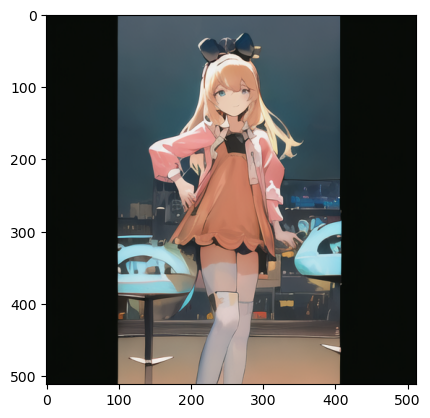

262.png


  0%|          | 0/18 [00:00<?, ?it/s]

263.png


  0%|          | 0/18 [00:00<?, ?it/s]

264.png


  0%|          | 0/18 [00:00<?, ?it/s]

265.png


  0%|          | 0/18 [00:00<?, ?it/s]

266.png


  0%|          | 0/18 [00:00<?, ?it/s]

267.png


  0%|          | 0/18 [00:00<?, ?it/s]

268.png


  0%|          | 0/18 [00:00<?, ?it/s]

269.png


  0%|          | 0/18 [00:00<?, ?it/s]

270.png


  0%|          | 0/18 [00:00<?, ?it/s]

271.png


  0%|          | 0/18 [00:00<?, ?it/s]

272.png


  0%|          | 0/18 [00:00<?, ?it/s]

273.png


  0%|          | 0/18 [00:00<?, ?it/s]

274.png


  0%|          | 0/18 [00:00<?, ?it/s]

275.png


  0%|          | 0/18 [00:00<?, ?it/s]

276.png


  0%|          | 0/18 [00:00<?, ?it/s]

277.png


  0%|          | 0/18 [00:00<?, ?it/s]

278.png


  0%|          | 0/18 [00:00<?, ?it/s]

279.png


  0%|          | 0/18 [00:00<?, ?it/s]

280.png


  0%|          | 0/18 [00:00<?, ?it/s]

281.png


  0%|          | 0/18 [00:00<?, ?it/s]

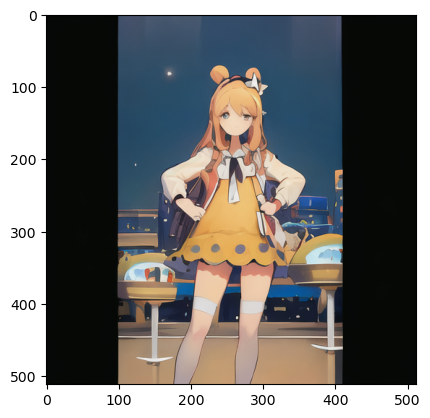

282.png


  0%|          | 0/18 [00:00<?, ?it/s]

283.png


  0%|          | 0/18 [00:00<?, ?it/s]

284.png


  0%|          | 0/18 [00:00<?, ?it/s]

285.png


  0%|          | 0/18 [00:00<?, ?it/s]

286.png


  0%|          | 0/18 [00:00<?, ?it/s]

287.png


  0%|          | 0/18 [00:00<?, ?it/s]

288.png


  0%|          | 0/18 [00:00<?, ?it/s]

289.png


  0%|          | 0/18 [00:00<?, ?it/s]

290.png


  0%|          | 0/18 [00:00<?, ?it/s]

291.png


  0%|          | 0/18 [00:00<?, ?it/s]

292.png


  0%|          | 0/18 [00:00<?, ?it/s]

293.png


  0%|          | 0/18 [00:00<?, ?it/s]

294.png


  0%|          | 0/18 [00:00<?, ?it/s]

295.png


  0%|          | 0/18 [00:00<?, ?it/s]

296.png


  0%|          | 0/18 [00:00<?, ?it/s]

297.png


  0%|          | 0/18 [00:00<?, ?it/s]

298.png


  0%|          | 0/18 [00:00<?, ?it/s]

299.png


  0%|          | 0/18 [00:00<?, ?it/s]

300.png


  0%|          | 0/18 [00:00<?, ?it/s]

In [144]:
for i in range(300):
    filename = str(i+1) + ".png"
    print(filename)
    file_path = os.path.join(hed_img_path, filename)
    hed_image = Image.open(file_path)
    hed_image = SquarePad()(hed_image)
    hed_image = F.resize(hed_image, size=(512,512)) 
    
    file_path = os.path.join(video_img_path, filename)
    video_image = Image.open(file_path)
    video_image = SquarePad()(video_image)
    video_image = F.resize(video_image, size=(512,512))

    torch.manual_seed(32)
    prompt = "masterpiece, best quality, 1girl, solo"
    negative_prompt = "nsfw, lowres, bad anatomy, bad hands, text, error, missing fingers,extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
    output = pipe(
        prompt,
        video_image,
        hed_image,
        strength = 0.9,
        negative_prompt=negative_prompt,
        num_inference_steps=20,
    )
    output[0][0].save(os.path.join(output_img_path, filename))
    if i % 20 == 0:
        plt.imshow(output[0][0])
        plt.show()


# 生成视频

In [145]:
fps = 30

# 获取图片总数
file_list = os.listdir(output_img_path)
file_num = len(file_list)

# 获取视频长宽
item = os.path.join(output_img_path, str(1) + '.png')
width, height, _ = cv2.imread(item).shape
print(width, height)
video = cv2.VideoWriter(output_video_path,  cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), fps, (height, width))  # 创建视频流对象


for i in range(file_num):
    item = os.path.join(output_img_path, str(i + 1) + '.png')
    if os.path.exists(item):
        print("read",item)
#         print(cv2.imread(item).shape)
        video.write(cv2.imread(item))  # 把图片写进视频
video.release()  # 释放

512 512
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/1.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/2.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/3.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/4.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/5.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/6.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/7.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/8.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/9.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/10.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/11.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/12.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/13.png
read /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/output_images/14.png
read /h

In [146]:
print("output video is here", output_video_path)

output video is here /home/ubuntu/AI二次元/0319_jiaran_yao/0319_v2.1/processed.mp4
